<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://www.linkedin.com/in/jennifer-esharegharan/">
          Jennifer Esharegharan</font></h1>
    
    
<h1 align=center><font size = 5>Sales Analysis<br><br>
    </font></h1>
</div>

#### Import the needed Libraries

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import os
import warnings
warnings.filterwarnings('ignore')

In [63]:
# get the current working directory
os.getcwd()

'C:\\Users\\Jeremy\\Documents\\My portfolio projects\\Python Project\\Sales'

#### The data is in several sheets and needs to be merged.

In [64]:
files = [file for file in os.listdir("C://Users//Jeremy//Documents//My portfolio projects//Python Project//Sales_2")]

combined_salesdf = pd.DataFrame()

for file in files:
    df= pd.read_csv("C://Users//Jeremy//Documents//My portfolio projects//Python Project//Sales_2//"+file)
    combined_salesdf = pd.concat([combined_salesdf, df])

combined_salesdf.to_csv("combined_salesdf.csv", index=False)


#### Read the new data set

In [65]:
sales_df = pd.read_csv("combined_salesdf.csv")
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [66]:
# Check the last 5 rows
sales_df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


### Exploring the data

* Check the shape

In [67]:
sales_df.shape

(186850, 6)

In [68]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


* Check the statistical analysis of the data

In [69]:
sales_df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


In [70]:
#How many elements/ data points are there? 
sales_df.size

1121100

In [71]:
#What are the column names? 
sales_df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [72]:
# check for rows with NAN
nan_df = sales_df[sales_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
#Check for null values for each column
sales_df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

* There are 545 null values in each of the columns. These need to be removed. 

In [74]:
#What types of columns we have in this data frame?
sales_df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

* 'Order date', 'Price' and 'Quantity' are in the wrong data type
* All other columns are in the right data type. 

### Data Cleaning and Preparation

#### The data needs to be cleaned and transformed in the following ways:
* Remove all NaN 
* Extract the month from the 'Order Date' column
* Convert the data type for the newly created 'Month' column to integer
* Convert the data type for'Quantity Ordered'from object to integer
* Convert the data type for 'Price' to integer
* Extract the city and state from the Purchase Address, into a new column 
* Create a 'Total Sales' column
* Drop rows with'OR' in the month column

In [75]:
# Extract the month from the Order Date and create a new column 'Month'
# Take the 1st 2 characters and make them the month column
sales_df['Month'] = sales_df['Order Date'].str[0:2]
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04


In [76]:
# drop all the Nan Values
sales_df= sales_df.dropna(how="all")
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [77]:
#Check to verify all Nan values have been dropped
sales_df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
dtype: int64

* All Nan Values have been dropped

In [79]:
# check for the months that have 'OR'
month_df = sales_df[sales_df['Order Date'].str[0:2] == "Or"]
month_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


In [80]:
#create a new dataframe which filters the rows where Month is not 'OR'
sales_df2 = sales_df[sales_df['Order Date'].str[0:2] !='Or']
sales_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


In [81]:
# Having dropped the rows with Month = Nan and Month == Or, the datatype for the month can be changed
sales_df2['Month'] = sales_df2['Month'].astype('int32')
sales_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [84]:
# Change the data type for 'Quantity Ordered' and 'Price Each' to integers
sales_df2 ['Quantity Ordered'] = pd.to_numeric(sales_df2["Quantity Ordered"]) 
sales_df2 ["Price Each"] =pd.to_numeric(sales_df2['Price Each'])


In [86]:
sales_df2.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
dtype: object

* Data types for Month, Price and Quantity Ordered have been converted.

#### What was the best month for sales? How much was earned in that month?

In [88]:
#create a 'Total Sales Column'
sales_df2['Total Sales'] = sales_df2["Quantity Ordered"] * sales_df2["Price Each"]
sales_df2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99


In [90]:
# Use a groupby to get the best month for sales
sales_df2.groupby('Month').sum()['Total Sales']

Month
1     1822256.73
2     2202022.42
3     2807100.38
4     3390670.24
5     3152606.75
6     2577802.26
7     2647775.76
8     2244467.88
9     2097560.13
10    3736726.88
11    3199603.20
12    4613443.34
Name: Total Sales, dtype: float64

In [91]:
sales_results = sales_df2.groupby('Month').sum()

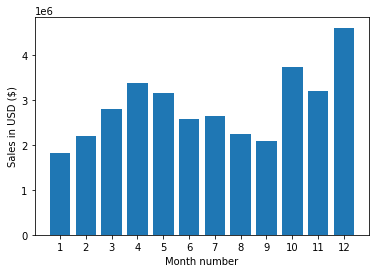

In [93]:
# It's better to view the data with a visual, hence, create a bar plot

months = range(1, 13)

plt.bar(months, sales_results['Total Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

#### What city had the highest number of sales?

In [94]:
# Extract the city and state from the Purchase Address
### write a function, use the apply method

def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

sales_df2['City'] = sales_df2 ['Purchase Address'].apply(lambda x: get_city(x) +' (' + get_state(x) + ')')
sales_df2.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Total Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,11.99,Los Angeles (CA)


In [95]:
# What city had the highest number of sales?
city_result = sales_df2.groupby('City').sum()
city_result

,Quantity Ordered,Price Each,Month,Sales,Total Sales
City,,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43,4664317.43
Portland (ME),2750,447189.25,17144,449758.27,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91,8262203.91


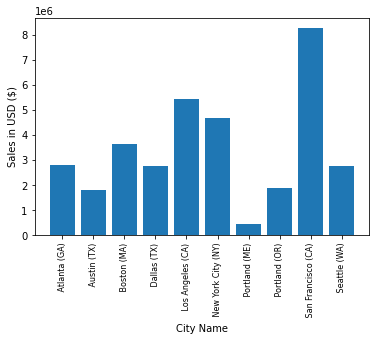

In [103]:
# View result on a bar plot

city_sales = [city for city, df in sales_df2.groupby('City')]

plt.bar(city_sales, city_result['Total Sales'])
plt.xticks(city_sales, rotation ="vertical", size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

* The city with the highest sales is San Francisco (CA).
* The city with the lowest sales in Portland(OR)

#### What is the highest selling product?

In [104]:
# sum up the quantity ordered based on grouping by the product
product_group = sales_df2.groupby('Product')
product_group.sum()



,Quantity Ordered,Price Each,Month,Sales,Total Sales
Product,,,,,
20in Monitor,4129,451068.99,29336,454148.71,454148.71
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,2435097.56
27in FHD Monitor,7550,1125974.93,52558,1132424.50,1132424.50
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,2355558.01
AA Batteries (4-pack),27635,79015.68,145558,106118.40,106118.40
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,92740.83
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,2349150.00
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,1345565.43
Flatscreen TV,4819,1440000.00,34224,1445700.00,1445700.00


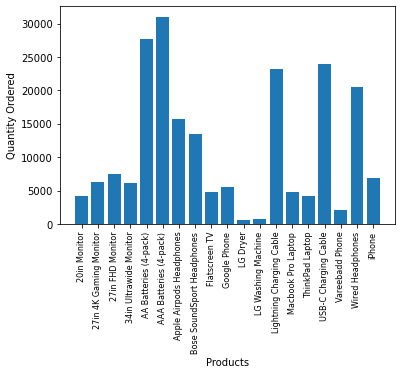

In [106]:
# Visualize on a barplot
# plot the graph again and add the rotations so that the x labels can show.

quantity_ordered = product_group.sum()['Quantity Ordered']

products= [product for product, df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Products')
plt.xticks(products, rotation = 'vertical', size = 8)
plt.show()

* The product with the highest sales is AAA Batteries (4 pack)
* The product with the lowest sales is LG Dryer

In [108]:
#### Check for a correlation between the price of products and the quantity sold
prices = sales_df2.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


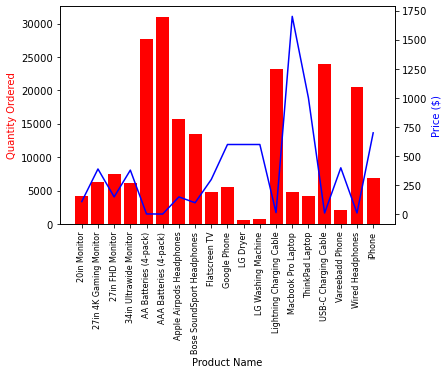

In [110]:
# Use a bar plot to show the correlation
# add a 2nd y axis to matplot lib chart
fig, ax1 =plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color= 'r')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='r')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

* The data shows that the highest selling products are those with the lowest prices.
* AAA batteries, AA batteries, Lighting charging Cable and USB charging cable show the above hypothesis. 